In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns


In [4]:
data=pd.read_csv('bikebuyer1.csv')

In [5]:
data.head()

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,13555.0,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,NaN,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,2.0,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,25410.0,NaN,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes


In [6]:
data.describe()

,ID,Yearly Income,Children,Cars,Commute Distance,Age
count,6996.000000,6997.000000,6979.000000,6997.000000,6968.000000,6997.000000
mean,17744.435249,57020.151493,1.111621,1.586823,4.210103,45.107332
std,4337.428859,32080.449720,1.600912,1.146782,2.926211,11.916654
min,2.000000,0.000000,0.000000,0.000000,1.000000,25.000000
25%,14249.750000,30000.000000,0.000000,1.000000,1.000000,36.000000
50%,17406.500000,60000.000000,0.000000,2.000000,4.000000,44.000000
75%,20609.500000,70000.000000,2.000000,2.000000,6.000000,53.000000
max,29476.000000,170000.000000,5.000000,4.000000,13.000000,96.000000


In [7]:
data.apply(lambda x: sum(x.isnull()),axis=0)

ID                   1
Marital Status      16
Gender              29
Yearly Income        0
Children            18
Education            0
Occupation           0
Home Owner           0
Cars                 0
Commute Distance    29
Region               0
Age                  0
Bike Buyer           0
dtype: int64

In [8]:
data['Gender'].value_counts()

Male      3527
Female    3441
Name: Gender, dtype: int64

In [9]:
data['Gender'].fillna('Male',inplace=True)

In [10]:
data.apply(lambda x: sum(x.isnull()),axis=0)

ID                   1
Marital Status      16
Gender               0
Yearly Income        0
Children            18
Education            0
Occupation           0
Home Owner           0
Cars                 0
Commute Distance    29
Region               0
Age                  0
Bike Buyer           0
dtype: int64

In [11]:
#examining marital status
data['Marital Status'].value_counts()

Married    4133
Single     2848
Name: Marital Status, dtype: int64

# since the highest rate of marital status is married..fill the missing values of marital status with Married

In [13]:
data['Marital Status'].fillna('Married',inplace=True)
data.apply(lambda x: sum(x.isnull()),axis=0)

ID                   1
Marital Status       0
Gender               0
Yearly Income        0
Children            18
Education            0
Occupation           0
Home Owner           0
Cars                 0
Commute Distance    29
Region               0
Age                  0
Bike Buyer           0
dtype: int64

# #** replacing the missing values of children column with median value**


In [14]:
data['Children'].mean()

1.1116205760137556

In [15]:
data['Children'].median()

0.0

In [16]:
data['Children'].mode()

0    0.0
dtype: float64

In [17]:
data['Children'].fillna(0,inplace=True)

In [18]:
data.apply(lambda x: sum(x.isnull()),axis=0)

ID                   1
Marital Status       0
Gender               0
Yearly Income        0
Children             0
Education            0
Occupation           0
Home Owner           0
Cars                 0
Commute Distance    29
Region               0
Age                  0
Bike Buyer           0
dtype: int64

# ##replacing commute distance missing values with median value

In [19]:
data['Commute Distance'].median()

4.0

In [20]:
data['Commute Distance'].fillna(4,inplace=True)
data.apply(lambda x: sum(x.isnull()),axis=0)


ID                  1
Marital Status      0
Gender              0
Yearly Income       0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Bike Buyer          0
dtype: int64

In [21]:
data.describe()

,ID,Yearly Income,Children,Cars,Commute Distance,Age
count,6996.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000
mean,17744.435249,57020.151493,1.108761,1.586823,4.209233,45.107332
std,4337.428859,32080.449720,1.599842,1.146782,2.920171,11.916654
min,2.000000,0.000000,0.000000,0.000000,1.000000,25.000000
25%,14249.750000,30000.000000,0.000000,1.000000,1.000000,36.000000
50%,17406.500000,60000.000000,0.000000,2.000000,4.000000,44.000000
75%,20609.500000,70000.000000,2.000000,2.000000,6.000000,53.000000
max,29476.000000,170000.000000,5.000000,4.000000,13.000000,96.000000


# dropping the column ID

In [22]:
data=data.drop(['ID'],axis=1)

In [23]:
data

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Married,Male,100000,4.0,High School,Professional,Yes,3,1.0,Europe,52,No
6993,Married,Female,130000,4.0,Partial College,Professional,Yes,4,2.0,Europe,52,No
6994,Married,Female,160000,5.0,Bachelors,Management,Yes,2,1.0,Europe,53,No
6995,Single,Female,120000,5.0,Partial College,Professional,Yes,3,1.0,Europe,54,No


dropping rows which contains Yearly Income value 0 because no person can have 0 as their yearly income# 

In [24]:
data=data.drop(data.index[[8,18]])
data

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Married,Male,100000,4.0,High School,Professional,Yes,3,1.0,Europe,52,No
6993,Married,Female,130000,4.0,Partial College,Professional,Yes,4,2.0,Europe,52,No
6994,Married,Female,160000,5.0,Bachelors,Management,Yes,2,1.0,Europe,53,No
6995,Single,Female,120000,5.0,Partial College,Professional,Yes,3,1.0,Europe,54,No


# Outlier elimination

In [26]:
data.dtypes

Marital Status       object
Gender               object
Yearly Income         int64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                  int64
Commute Distance    float64
Region               object
Age                   int64
Bike Buyer           object
dtype: object

In [27]:
data.describe()

,Yearly Income,Children,Cars,Commute Distance,Age
count,6995.000000,6995.000000,6995.000000,6995.000000,6995.000000
mean,57036.454610,1.109078,1.587134,4.208721,45.107934
std,32070.540156,1.599961,1.146768,2.919648,11.918004
min,10000.000000,0.000000,0.000000,1.000000,25.000000
25%,30000.000000,0.000000,1.000000,1.000000,36.000000
50%,60000.000000,0.000000,2.000000,4.000000,44.000000
75%,70000.000000,2.000000,2.000000,6.000000,53.000000
max,170000.000000,5.000000,4.000000,13.000000,96.000000


##### we will go with the removal of true outliers. If the data in numerical attributes are more than 3 standard deviations away from the mean we will treat them as true outliers.

In [28]:
data[(data['Yearly Income'] < 3*32070 + 57036.454610) &
   (data['Children'] < 3*1.599034 + 1.111508) & 
   (data['Cars'] < 3*1.146768 + 1.587134) & 
   (data['Commute Distance'] < 3*2.919648 + 4.208721) &
   (data['Age'] < 3*11.918004 + 45.107934)]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
4,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
5,Married,Male,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
6,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
6991,Married,Female,80000,2.0,Partial College,Professional,Yes,2,7.0,Europe,53,No
6992,Married,Male,100000,4.0,High School,Professional,Yes,3,1.0,Europe,52,No
6993,Married,Female,130000,4.0,Partial College,Professional,Yes,4,2.0,Europe,52,No
6995,Single,Female,120000,5.0,Partial College,Professional,Yes,3,1.0,Europe,54,No


# Exploration Data Analysis

In [29]:
#examining marital status
data['Marital Status'].value_counts()

Married    4148
Single     2847
Name: Marital Status, dtype: int64

In [30]:
data['Bike Buyer'].value_counts()

No     5997
Yes     998
Name: Bike Buyer, dtype: int64

In [31]:
data['Gender'].value_counts()

Male      3555
Female    3440
Name: Gender, dtype: int64

In [32]:
data[data['Gender'].str.contains('Female')&data['Marital Status'].str.contains('Single')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
6,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
7,Single,Female,60000,0.0,High School,Professional,No,2,1.0,North America,49,No
9,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes
16,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
20,Single,Female,60000,2.0,Bachelors,Professional,Yes,2,1.0,Pacific,43,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
6935,Single,Female,60000,0.0,Graduate Degree,Management,Yes,2,2.0,North America,72,No
6938,Single,Female,40000,0.0,High School,Professional,No,2,6.0,North America,61,No
6955,Single,Female,60000,1.0,Partial College,Professional,Yes,1,1.0,North America,58,No
6979,Single,Female,120000,4.0,Partial High School,Professional,Yes,4,1.0,Europe,51,No


In [33]:
data[data['Marital Status'].str.contains('Single')&data['Bike Buyer'].str.contains('Yes')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
6,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
9,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes
12,Single,Male,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
16,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1940,Single,Female,20000,1.0,Partial College,Manual,No,0,5.0,Europe,45,Yes
1951,Single,Female,60000,2.0,Graduate Degree,Professional,No,0,4.0,North America,43,Yes
1955,Single,Female,80000,0.0,Bachelors,Management,No,1,7.0,North America,38,Yes
1959,Single,Female,20000,1.0,Partial High School,Clerical,Yes,2,3.0,Pacific,56,Yes


In [34]:
data[data['Marital Status'].str.contains('Married')&data['Bike Buyer'].str.contains('Yes')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
4,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
13,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,50,Yes
17,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,51,Yes
23,Married,Female,70000,0.0,Graduate Degree,Professional,Yes,0,4.0,North America,37,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Married,Female,80000,0.0,Partial College,Skilled Manual,Yes,1,1.0,North America,48,Yes
1944,Married,Male,60000,0.0,High School,Professional,Yes,2,1.0,North America,49,Yes
1946,Married,Male,40000,0.0,High School,Skilled Manual,Yes,2,1.0,North America,30,Yes
1949,Married,Female,70000,4.0,Partial College,Skilled Manual,Yes,3,2.0,Pacific,45,Yes


In [35]:
data[data['Gender'].str.contains('Female')&data['Marital Status'].str.contains('Married')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
4,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
11,Married,Female,70000,2.0,Partial College,Professional,No,0,11.0,North America,49,No
13,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,50,Yes
17,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,51,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
6989,Married,Female,100000,4.0,Bachelors,Management,Yes,1,5.0,Europe,60,No
6990,Married,Female,150000,4.0,Graduate Degree,Management,Yes,4,6.0,Europe,60,No
6991,Married,Female,80000,2.0,Partial College,Professional,Yes,2,7.0,Europe,53,No
6993,Married,Female,130000,4.0,Partial College,Professional,Yes,4,2.0,Europe,52,No


In [36]:
data[data['Gender'].str.contains('Male')&data['Marital Status'].str.contains('Single')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
3,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
10,Single,Male,50000,0.0,Bachelors,Management,No,2,2.0,North America,64,No
12,Single,Male,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
15,Single,Male,70000,0.0,Partial College,Skilled Manual,No,1,1.0,Pacific,44,No
...,...,...,...,...,...,...,...,...,...,...,...,...
6911,Single,Male,20000,0.0,High School,Manual,No,1,5.0,Europe,30,No
6940,Single,Male,40000,0.0,High School,Professional,No,2,1.0,North America,61,No
6942,Single,Male,40000,0.0,High School,Professional,No,3,1.0,North America,61,No
6953,Single,Male,60000,1.0,Partial College,Professional,Yes,1,1.0,North America,58,No


In [37]:
data[data['Gender'].str.contains('Male')&data['Marital Status'].str.contains('Married')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
2,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
5,Married,Male,120000,2.0,Bachelors,Management,Yes,3,1.0,North America,40,No
14,Married,Male,90000,0.0,Partial College,Professional,Yes,1,1.0,North America,49,No
22,Married,Male,70000,4.0,Bachelors,Professional,Yes,2,1.0,Pacific,44,No
26,Married,Male,70000,4.0,Partial College,Skilled Manual,Yes,2,1.0,Pacific,44,No
...,...,...,...,...,...,...,...,...,...,...,...,...
6985,Married,Male,110000,4.0,Bachelors,Management,Yes,4,8.0,Europe,61,No
6987,Married,Male,130000,4.0,Bachelors,Management,Yes,4,2.0,Europe,61,No
6988,Married,Male,100000,3.0,Bachelors,Management,Yes,4,3.0,Europe,60,No
6992,Married,Male,100000,4.0,High School,Professional,Yes,3,1.0,Europe,52,No


In [38]:
data[data['Gender'].str.contains('Female')&data['Bike Buyer'].str.contains('Yes')] #521

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
4,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
6,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
9,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes
13,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1949,Married,Female,70000,4.0,Partial College,Skilled Manual,Yes,3,2.0,Pacific,45,Yes
1951,Single,Female,60000,2.0,Graduate Degree,Professional,No,0,4.0,North America,43,Yes
1955,Single,Female,80000,0.0,Bachelors,Management,No,1,7.0,North America,38,Yes
1959,Single,Female,20000,1.0,Partial High School,Clerical,Yes,2,3.0,Pacific,56,Yes


In [39]:
data[data['Gender'].str.contains('Male')&data['Bike Buyer'].str.contains('Yes')] #477

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
12,Single,Male,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
29,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
31,Married,Male,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,42,Yes
33,Single,Male,30000,0.0,Bachelors,Clerical,Yes,0,2.0,Europe,63,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1939,Married,Male,30000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,44,Yes
1941,Married,Male,50000,1.0,Bachelors,Skilled Manual,Yes,0,5.0,North America,36,Yes
1944,Married,Male,60000,0.0,High School,Professional,Yes,2,1.0,North America,49,Yes
1946,Married,Male,40000,0.0,High School,Skilled Manual,Yes,2,1.0,North America,30,Yes


In [40]:
data[data['Gender'].str.contains('Female')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Single')] #272

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
6,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
9,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes
16,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
20,Single,Female,60000,2.0,Bachelors,Professional,Yes,2,1.0,Pacific,43,Yes
25,Single,Female,90000,0.0,Partial College,Professional,No,2,1.0,Europe,62,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1940,Single,Female,20000,1.0,Partial College,Manual,No,0,5.0,Europe,45,Yes
1951,Single,Female,60000,2.0,Graduate Degree,Professional,No,0,4.0,North America,43,Yes
1955,Single,Female,80000,0.0,Bachelors,Management,No,1,7.0,North America,38,Yes
1959,Single,Female,20000,1.0,Partial High School,Clerical,Yes,2,3.0,Pacific,56,Yes


In [41]:
data[data['Gender'].str.contains('Female')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Married')]#249

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
4,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
13,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,50,Yes
17,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,51,Yes
23,Married,Female,70000,0.0,Graduate Degree,Professional,Yes,0,4.0,North America,37,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1913,Married,Female,60000,0.0,Partial College,Skilled Manual,Yes,1,7.0,Pacific,46,Yes
1920,Married,Female,30000,0.0,Partial College,Clerical,No,2,4.0,Pacific,66,Yes
1931,Married,Female,50000,1.0,Graduate Degree,Skilled Manual,Yes,0,1.0,North America,34,Yes
1942,Married,Female,80000,0.0,Partial College,Skilled Manual,Yes,1,1.0,North America,48,Yes


In [42]:
data[data['Gender'].str.contains('Male')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Single')] #222

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
12,Single,Male,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
29,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
33,Single,Male,30000,0.0,Bachelors,Clerical,Yes,0,2.0,Europe,63,Yes
48,Single,Male,20000,1.0,Partial High School,Clerical,Yes,2,1.0,Pacific,58,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1870,Single,Male,40000,0.0,Partial College,Clerical,Yes,1,4.0,North America,48,Yes
1875,Single,Male,90000,0.0,Bachelors,Professional,Yes,0,9.0,Pacific,40,Yes
1899,Single,Male,60000,0.0,Partial College,Professional,No,2,2.0,North America,32,Yes
1922,Single,Male,110000,5.0,High School,Management,Yes,4,3.0,Pacific,34,Yes


In [43]:
data[data['Gender'].str.contains('Male')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Married')] #255


,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
31,Married,Male,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,42,Yes
44,Married,Male,50000,0.0,Graduate Degree,Management,Yes,1,1.0,Pacific,63,Yes
45,Married,Male,80000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,47,Yes
54,Married,Male,110000,5.0,Partial High School,Professional,Yes,4,4.0,Pacific,35,Yes
58,Married,Male,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,52,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1939,Married,Male,30000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,44,Yes
1941,Married,Male,50000,1.0,Bachelors,Skilled Manual,Yes,0,5.0,North America,36,Yes
1944,Married,Male,60000,0.0,High School,Professional,Yes,2,1.0,North America,49,Yes
1946,Married,Male,40000,0.0,High School,Skilled Manual,Yes,2,1.0,North America,30,Yes


In [44]:
data[data['Gender'].str.contains('Female')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Single')&data['Region'].str.contains('Europe')]
#74

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
9,Single,Female,20000,1.0,Partial College,Manual,No,0,1.0,Europe,46,Yes
25,Single,Female,90000,0.0,Partial College,Professional,No,2,1.0,Europe,62,Yes
77,Single,Female,20000,0.0,High School,Manual,Yes,1,7.0,Europe,43,Yes
86,Single,Female,40000,0.0,Bachelors,Clerical,No,0,1.0,Europe,39,Yes
123,Single,Female,10000,0.0,Partial College,Manual,Yes,1,6.0,Europe,52,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1901,Single,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
1914,Single,Female,130000,4.0,Partial College,Professional,No,2,8.0,Europe,48,Yes
1927,Single,Female,30000,2.0,Partial College,Clerical,Yes,1,3.0,Europe,40,Yes
1933,Single,Female,30000,0.0,Bachelors,Clerical,Yes,0,1.0,Europe,63,Yes


In [45]:
data[data['Gender'].str.contains('Female')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Single')&data['Region'].str.contains('North America')]
#129

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
16,Single,Female,50000,2.0,Bachelors,Skilled Manual,Yes,1,2.0,North America,39,Yes
32,Single,Female,40000,0.0,Partial College,Skilled Manual,No,1,6.0,North America,30,Yes
57,Single,Female,40000,0.0,High School,Skilled Manual,Yes,1,4.0,North America,31,Yes
61,Single,Female,50000,3.0,Bachelors,Skilled Manual,Yes,2,7.0,North America,41,Yes
62,Single,Female,60000,0.0,Partial College,Skilled Manual,Yes,2,8.0,North America,33,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1915,Single,Female,70000,2.0,Partial College,Professional,Yes,1,9.0,North America,50,Yes
1919,Single,Female,70000,0.0,Graduate Degree,Professional,No,0,6.0,North America,36,Yes
1930,Single,Female,60000,0.0,Graduate Degree,Professional,No,0,7.0,North America,35,Yes
1951,Single,Female,60000,2.0,Graduate Degree,Professional,No,0,4.0,North America,43,Yes


In [46]:
data[data['Gender'].str.contains('Female')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Single')&data['Region'].str.contains('Pacific')]
#69

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
6,Single,Female,70000,0.0,High School,Professional,Yes,2,4.0,Pacific,49,Yes
20,Single,Female,60000,2.0,Bachelors,Professional,Yes,2,1.0,Pacific,43,Yes
30,Single,Female,70000,0.0,Bachelors,Professional,Yes,1,1.0,Pacific,42,Yes
40,Single,Female,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,38,Yes
83,Single,Female,80000,0.0,High School,Skilled Manual,Yes,2,6.0,Pacific,50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1827,Single,Female,90000,0.0,Bachelors,Management,No,1,5.0,Pacific,48,Yes
1828,Single,Female,10000,0.0,Partial College,Manual,No,1,1.0,Pacific,26,Yes
1843,Single,Female,80000,4.0,Graduate Degree,Management,Yes,0,1.0,Pacific,37,Yes
1959,Single,Female,20000,1.0,Partial High School,Clerical,Yes,2,3.0,Pacific,56,Yes


In [47]:
data[data['Gender'].str.contains('Female')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Married')&data['Region'].str.contains('Europe')]
#72

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
1,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
106,Married,Female,40000,0.0,Bachelors,Skilled Manual,Yes,0,5.0,Europe,43,Yes
109,Married,Female,150000,3.0,Partial College,Professional,Yes,3,1.0,Europe,49,Yes
111,Married,Female,20000,0.0,Partial College,Manual,No,1,10.0,Europe,47,Yes
115,Married,Female,170000,4.0,High School,Professional,Yes,2,5.0,Europe,51,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1815,Married,Female,10000,0.0,Partial College,Manual,Yes,1,6.0,Europe,51,Yes
1836,Married,Female,30000,1.0,Bachelors,Skilled Manual,Yes,2,3.0,Europe,40,Yes
1862,Married,Female,40000,0.0,Bachelors,Skilled Manual,Yes,0,5.0,Europe,42,Yes
1867,Married,Female,30000,0.0,Bachelors,Clerical,Yes,0,2.0,Europe,46,Yes


In [48]:
data[data['Gender'].str.contains('Female')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Married')&data['Region'].str.contains('North America')]
#125

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
4,Married,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes
13,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,50,Yes
17,Married,Female,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,51,Yes
23,Married,Female,70000,0.0,Graduate Degree,Professional,Yes,0,4.0,North America,37,Yes
41,Married,Female,70000,1.0,Partial College,Professional,Yes,2,8.0,North America,58,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1841,Married,Female,40000,0.0,Partial College,Professional,No,2,7.0,North America,54,Yes
1854,Married,Female,70000,0.0,Graduate Degree,Management,Yes,2,3.0,North America,71,Yes
1869,Married,Female,60000,0.0,Graduate Degree,Professional,Yes,0,6.0,North America,37,Yes
1931,Married,Female,50000,1.0,Graduate Degree,Skilled Manual,Yes,0,1.0,North America,34,Yes


In [49]:

data[data['Gender'].str.contains('Female')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Married')&data['Region'].str.contains('Pacific')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
47,Married,Female,20000,0.0,Bachelors,Clerical,No,0,5.0,Pacific,27,Yes
55,Married,Female,40000,0.0,Bachelors,Management,Yes,2,2.0,Pacific,65,Yes
103,Married,Female,120000,0.0,Graduate Degree,Management,No,0,1.0,Pacific,37,Yes
214,Married,Female,20000,0.0,Bachelors,Clerical,Yes,0,1.0,Pacific,28,Yes
267,Married,Female,60000,0.0,Bachelors,Professional,No,1,1.0,Pacific,45,Yes
282,Married,Female,130000,5.0,High School,Management,Yes,4,2.0,Pacific,33,Yes
383,Married,Female,70000,0.0,Bachelors,Professional,Yes,2,5.0,Pacific,30,Yes
406,Married,Female,10000,0.0,High School,Manual,Yes,2,1.0,Pacific,30,Yes
444,Married,Female,70000,5.0,Bachelors,Professional,Yes,4,6.0,Pacific,38,Yes
563,Married,Female,60000,2.0,Bachelors,Professional,Yes,1,5.0,Pacific,38,Yes


In [50]:
data[data['Gender'].str.contains('Male')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Single')&data['Region'].str.contains('Europe')]
#69

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
29,Single,Male,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
33,Single,Male,30000,0.0,Bachelors,Clerical,Yes,0,2.0,Europe,63,Yes
76,Single,Male,100000,3.0,Partial College,Professional,Yes,4,6.0,Europe,49,Yes
79,Single,Male,30000,0.0,Bachelors,Clerical,No,0,4.0,Europe,37,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1606,Single,Male,20000,1.0,Partial College,Manual,No,0,5.0,Europe,46,Yes
1685,Single,Male,30000,2.0,Partial College,Clerical,Yes,1,7.0,Europe,41,Yes
1730,Single,Male,30000,2.0,Partial College,Manual,Yes,0,2.0,Europe,40,Yes
1762,Single,Male,30000,0.0,Partial College,Clerical,No,1,2.0,Europe,30,Yes


In [51]:
data[data['Gender'].str.contains('Male')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Single')&data['Region'].str.contains('North America')]
#95

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
12,Single,Male,60000,0.0,Partial College,Skilled Manual,No,2,1.0,North America,31,Yes
50,Single,Male,60000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,39,Yes
66,Single,Male,40000,0.0,High School,Skilled Manual,No,2,6.0,North America,27,Yes
72,Single,Male,30000,0.0,High School,Skilled Manual,Yes,2,9.0,North America,48,Yes
110,Single,Male,70000,0.0,Graduate Degree,Management,Yes,2,1.0,North America,65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1839,Single,Male,70000,4.0,Partial College,Professional,Yes,3,5.0,North America,45,Yes
1857,Single,Male,60000,2.0,Bachelors,Skilled Manual,No,0,7.0,North America,37,Yes
1870,Single,Male,40000,0.0,Partial College,Clerical,Yes,1,4.0,North America,48,Yes
1899,Single,Male,60000,0.0,Partial College,Professional,No,2,2.0,North America,32,Yes


In [52]:
data[data['Gender'].str.contains('Male')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Single')&data['Region'].str.contains('Pacific')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
48,Single,Male,20000,1.0,Partial High School,Clerical,Yes,2,1.0,Pacific,58,Yes
90,Single,Male,40000,0.0,Bachelors,Management,Yes,2,4.0,Pacific,63,Yes
117,Single,Male,80000,0.0,Partial College,Skilled Manual,No,2,7.0,Pacific,52,Yes
132,Single,Male,120000,1.0,Bachelors,Management,Yes,4,3.0,Pacific,48,Yes
157,Single,Male,20000,0.0,Partial College,Manual,Yes,0,1.0,Pacific,29,Yes
205,Single,Male,70000,0.0,Bachelors,Professional,No,2,1.0,Pacific,43,Yes
232,Single,Male,10000,0.0,Partial College,Manual,No,1,1.0,Pacific,28,Yes
298,Single,Male,20000,0.0,Bachelors,Clerical,Yes,0,1.0,Pacific,28,Yes
299,Single,Male,20000,0.0,Bachelors,Clerical,Yes,0,5.0,Pacific,28,Yes
311,Single,Male,20000,0.0,Bachelors,Clerical,Yes,0,5.0,Pacific,27,Yes


In [53]:
data[data['Gender'].str.contains('Male')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Married')&data['Region'].str.contains('Europe')]
#65

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
82,Married,Male,40000,1.0,Bachelors,Skilled Manual,Yes,1,5.0,Europe,34,Yes
108,Married,Male,20000,0.0,Partial College,Manual,Yes,1,1.0,Europe,47,Yes
116,Married,Male,30000,0.0,Graduate Degree,Clerical,Yes,0,6.0,Europe,45,Yes
156,Married,Male,40000,1.0,Bachelors,Skilled Manual,Yes,0,5.0,Europe,31,Yes
184,Married,Male,110000,5.0,Partial High School,Professional,Yes,3,2.0,Europe,59,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1861,Married,Male,30000,0.0,Bachelors,Clerical,Yes,0,1.0,Europe,47,Yes
1909,Married,Male,130000,4.0,Partial College,Professional,Yes,2,6.0,Europe,49,Yes
1925,Married,Male,150000,4.0,High School,Professional,Yes,3,9.0,Europe,51,Yes
1939,Married,Male,30000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,44,Yes


In [54]:
data[data['Gender'].str.contains('Male')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Married')&data['Region'].str.contains('North America')]
#131

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
45,Married,Male,80000,0.0,Graduate Degree,Professional,Yes,0,1.0,North America,47,Yes
58,Married,Male,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,52,Yes
87,Married,Male,70000,0.0,Graduate Degree,Professional,Yes,1,2.0,North America,47,Yes
89,Married,Male,40000,0.0,High School,Professional,Yes,3,6.0,North America,60,Yes
96,Married,Male,60000,1.0,Bachelors,Management,Yes,0,2.0,North America,58,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1934,Married,Male,40000,0.0,Partial College,Clerical,Yes,1,1.0,North America,48,Yes
1935,Married,Male,60000,0.0,Partial College,Skilled Manual,No,1,2.0,North America,39,Yes
1941,Married,Male,50000,1.0,Bachelors,Skilled Manual,Yes,0,5.0,North America,36,Yes
1944,Married,Male,60000,0.0,High School,Professional,Yes,2,1.0,North America,49,Yes


In [55]:
data[data['Gender'].str.contains('Male')&data['Bike Buyer'].str.contains('Yes')&data['Marital Status'].str.contains('Married')&data['Region'].str.contains('Pacific')]

,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
31,Married,Male,70000,0.0,Bachelors,Professional,No,1,1.0,Pacific,42,Yes
44,Married,Male,50000,0.0,Graduate Degree,Management,Yes,1,1.0,Pacific,63,Yes
54,Married,Male,110000,5.0,Partial High School,Professional,Yes,4,4.0,Pacific,35,Yes
92,Married,Male,60000,0.0,Partial College,Skilled Manual,Yes,1,3.0,Pacific,46,Yes
107,Married,Male,100000,1.0,Bachelors,Management,Yes,3,1.0,Pacific,47,Yes
135,Married,Male,110000,0.0,Graduate Degree,Management,Yes,0,9.0,Pacific,37,Yes
165,Married,Male,10000,0.0,Partial College,Manual,No,1,7.0,Pacific,28,Yes
196,Married,Male,110000,5.0,Partial College,Management,Yes,3,7.0,Pacific,33,Yes
216,Married,Male,20000,0.0,Bachelors,Clerical,No,0,4.0,Pacific,29,Yes
226,Married,Male,40000,0.0,Bachelors,Management,No,2,4.0,Pacific,62,Yes


In [56]:
data.cov()


,Yearly Income,Children,Cars,Commute Distance,Age
Yearly Income,1.028520e+09,24328.164874,17355.058752,910.319741,74667.926332
Children,2.432816e+04,2.559876,0.821850,0.121211,-0.005341
Cars,1.735506e+04,0.821850,1.315076,0.062880,1.927325
Commute Distance,9.103197e+02,0.121211,0.062880,8.524345,-0.899140
Age,7.466793e+04,-0.005341,1.927325,-0.899140,142.038820


In [57]:
data.corr()

,Yearly Income,Children,Cars,Commute Distance,Age
Yearly Income,1.000000,0.474126,0.471894,0.009722,0.195355
Children,0.474126,1.000000,0.447927,0.025948,-0.000280
Cars,0.471894,0.447927,1.000000,0.018781,0.141018
Commute Distance,0.009722,0.025948,0.018781,1.000000,-0.025840
Age,0.195355,-0.000280,0.141018,-0.025840,1.000000


# Data Visualization

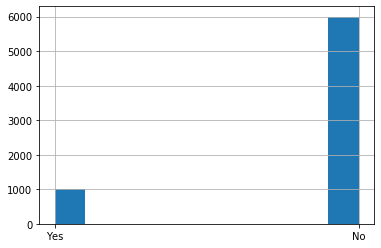

In [58]:
data['Bike Buyer'].hist(bins=10)

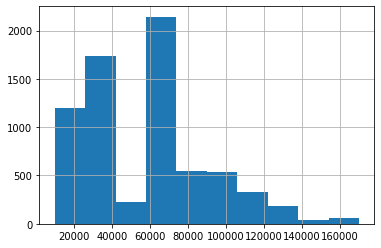

In [59]:
data['Yearly Income'].hist()

In [60]:
data['Yearly Income'].mean()

57036.45461043603

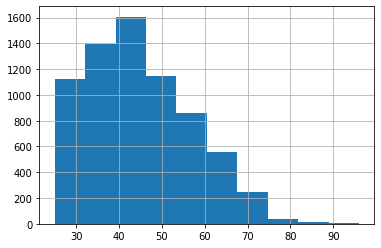

In [61]:
data['Age'].hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3C47F8C08>,
      dtype=object)

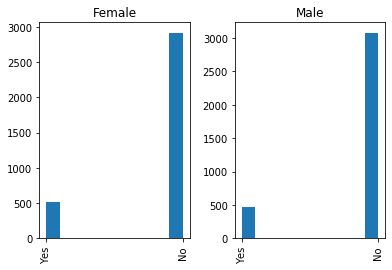

In [62]:
data.hist(column='Bike Buyer',by='Gender',bins=10)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3C48D23C8>,
      dtype=object)

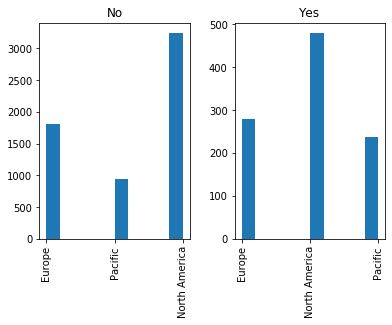

In [63]:
data.hist(column='Region',by='Bike Buyer',bins=10)

####There are more number of North Americans who are willing to buy and who are not willing to buy also when compared to three regions

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3C48B8FC8>,
      dtype=object)

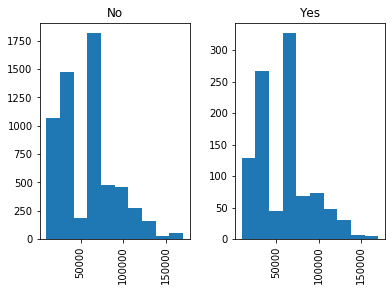

In [64]:
data.hist(column='Yearly Income',by='Bike Buyer',bins=10)

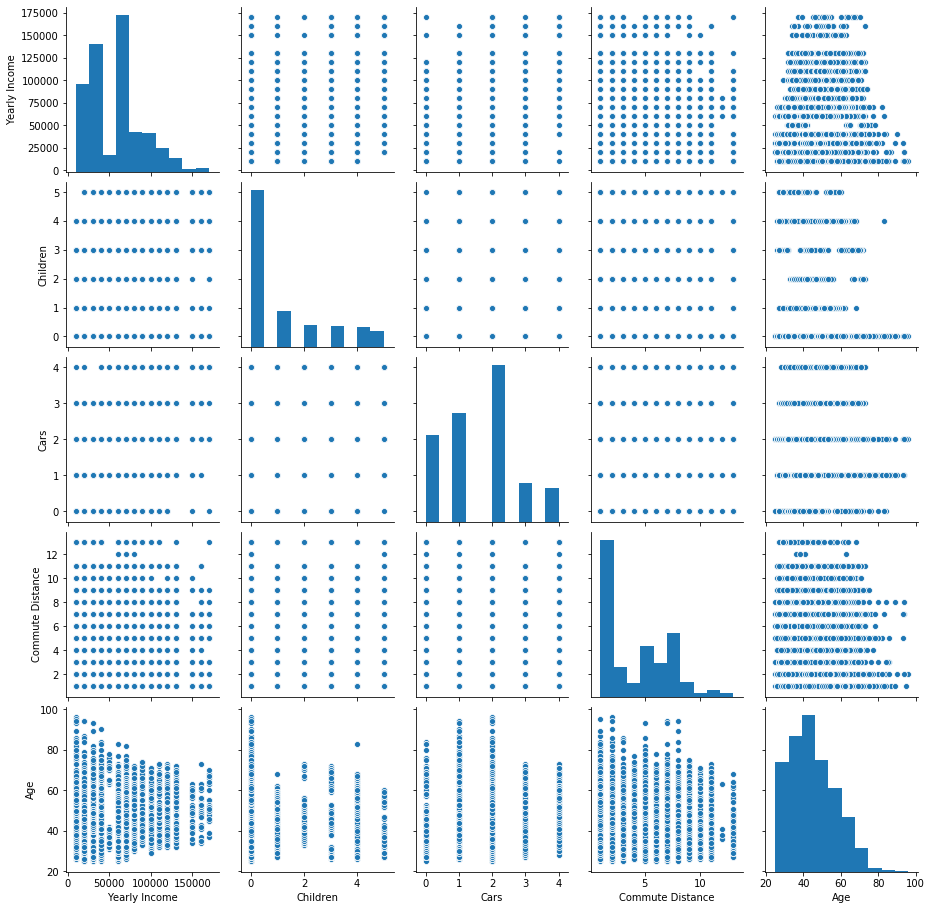

In [65]:
n=data.keys()
sns.pairplot(data[n])

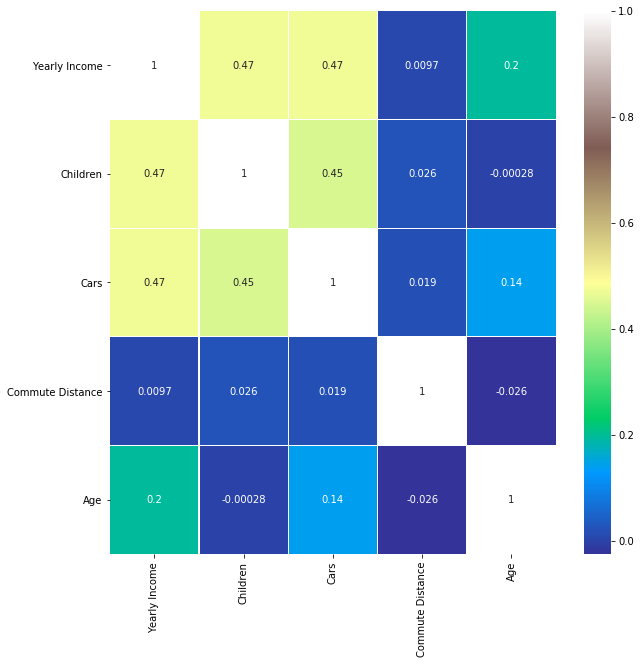

In [66]:
n=data.keys()
sns.heatmap(data[n].corr(),annot=True,cmap='terrain',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [67]:
x=data.iloc[:,:-1].values
y=data.iloc[:,11].values

In [68]:
x

array([['Single', 'Male', 30000, ..., 1.0, 'Europe', 33],
       ['Married', 'Female', 40000, ..., 1.0, 'Europe', 37],
       ['Married', 'Male', 160000, ..., 2.0, 'Europe', 55],
       ...,
       ['Married', 'Female', 160000, ..., 1.0, 'Europe', 53],
       ['Single', 'Female', 120000, ..., 1.0, 'Europe', 54],
       ['Married', 'Male', 130000, ..., 2.0, 'Europe', 54]], dtype=object)

In [69]:
y

array(['Yes', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

# Label Encoding and OneHotEncoding

In [72]:

minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[1.        , 1.        , 0.125     , ..., 0.        , 0.        ,
        0.11267606],
       [0.        , 0.        , 0.1875    , ..., 0.        , 0.        ,
        0.16901408],
       [0.        , 1.        , 0.9375    , ..., 0.08333333, 0.        ,
        0.42253521],
       ...,
       [0.        , 0.        , 0.9375    , ..., 0.        , 0.        ,
        0.3943662 ],
       [1.        , 0.        , 0.6875    , ..., 0.        , 0.        ,
        0.4084507 ],
       [0.        , 1.        , 0.75      , ..., 0.08333333, 0.        ,
        0.4084507 ]])

# Conclusion:

<BarContainer object of 5 artists>

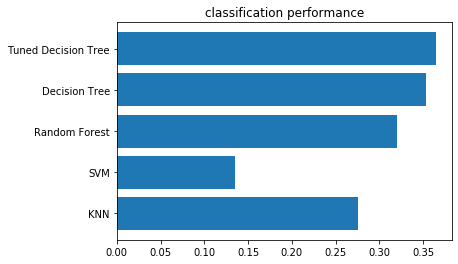

In [75]:
x_axis=['KNN','SVM','Random Forest','Decision Tree','Tuned Decision Tree']
y_axis=[0.275862,0.134615,0.320557,0.352941,0.364130]
plt.title('classification performance')
plt.barh(x_axis,y_axis)